In [1]:
# add local directory to import path
import os
import sys
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
#### --- Standard imports ------
import pandas as pd
import seaborn as sns
import numpy as np
import re

# local import
import nfl_bdb24
import nflutil

In [3]:
from importlib import reload
reload(nfl_bdb24)

<module 'nfl_bdb24' from 'c:\\Users\\pschl\\Documents\\data_science\\kaggle_nfl_bdb_2024\\nfl_bdb24.py'>

# Load the data, transform tracking data to standard coordinates

In [4]:
track_df = pd.DataFrame()
play_df = pd.read_csv('csv/plays.csv')
game_df = pd.read_csv('csv/games.csv')
player_df= pd.read_csv('csv/players.csv')
tackle_df = pd.read_csv('csv/tackles.csv')

# metric file
metric_df = pd.read_csv('interm_files/prep_tackle_metrics.csv')

# tracking data for all weeks
weeks = range(1,10)
for week in weeks:
    track_df = pd.concat([track_df, pd.read_csv(f'csv/tracking_week_{week}.csv').pipe(nflutil.transform_tracking_data)], ignore_index=True)

In [5]:
# metric_df = pd.read_csv('interm_files/prep_tackle_metrics.csv')
metric_df

,gameId,playId,contactFrameId,tackleFrameId,frames,d_actual,d_ideal,d_eff,gap_tackle,w_carrier,w_tackler,s_downfield_delta,s_contact,s_downfield_contact,s_downfield_contact_t
0,2022090800,56,10,18,8,5.01,5.006246,0.999251,0.670298,191,208,-1.031605,2.19,1.027805,-0.176900
1,2022090800,80,20,26,6,4.87,3.768183,0.773754,0.367696,237,230,1.282870,7.54,4.724593,1.267077
2,2022090800,101,38,45,7,8.01,5.029374,0.627887,2.476812,203,184,1.479387,6.63,6.516861,0.000000
3,2022090800,122,20,29,9,12.09,11.855248,0.980583,0.573149,203,242,1.839019,5.78,4.435508,1.088474
4,2022090800,167,14,18,4,7.00,6.968414,0.995488,1.591540,191,240,2.724202,6.61,5.702966,4.467674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,2022110700,3658,40,55,15,13.06,12.127753,0.928618,1.341343,211,289,-1.780591,4.77,4.476612,2.177571
6638,2022110700,3686,42,72,30,8.39,6.245190,0.744361,1.015135,211,240,-0.222288,2.07,1.630960,2.704653
6639,2022110700,3707,39,54,15,9.29,9.080666,0.977467,1.452790,211,240,0.203598,2.94,2.861382,-0.836280
6640,2022110700,3740,31,38,7,10.29,9.281939,0.902035,0.733757,211,261,0.486456,7.08,0.596133,-2.118918


In [6]:
metric_df[['frames','d_eff','gap_tackle','s_downfield_delta','s_contact']].describe()

,frames,d_eff,gap_tackle,s_downfield_delta,s_contact
count,6642.000000,6409.000000,6642.000000,6642.000000,6642.000000
mean,10.520325,0.882111,1.147136,0.184164,4.663930
std,6.038472,0.181244,0.994771,1.424440,1.876429
min,1.000000,0.037216,0.014142,-5.879230,0.010000
25%,6.000000,0.855695,0.547083,-0.763188,3.372500
50%,9.000000,0.965805,0.880227,0.194218,4.670000
75%,14.000000,0.992978,1.370839,1.146680,6.000000
max,30.000000,1.021144,13.601724,6.570209,10.100000


In [7]:
metric_df.sort_values('d_eff', ascending=False).head(10)

,gameId,playId,contactFrameId,tackleFrameId,frames,d_actual,d_ideal,d_eff,gap_tackle,w_carrier,w_tackler,s_downfield_delta,s_contact,s_downfield_contact,s_downfield_contact_t
2907,2022100210,2317,10,25,15,0.39,0.398246,1.021144,1.438923,220,305,1.768702,0.65,0.554867,-0.733611
4471,2022101610,1280,7,25,18,0.12,0.122066,1.017213,0.765572,237,308,1.022407,0.63,0.571020,-0.469108
1962,2022092506,4018,13,24,11,0.87,0.883629,1.015665,1.667363,216,303,-0.157726,1.96,1.729774,0.194032
3471,2022100905,2233,2,16,14,0.57,0.578705,1.015273,0.446542,180,191,-0.924268,5.09,0.058631,-1.157092
5845,2022103009,1988,2,13,11,0.31,0.313847,1.012410,0.444072,220,203,-3.047959,4.92,0.289216,-3.129630
4638,2022102000,1430,2,29,27,0.35,0.353836,1.010960,0.626498,250,199,0.090730,0.24,-0.151460,-2.757304
3908,2022101000,2071,2,17,15,0.21,0.212132,1.010153,0.609590,207,183,1.832923,2.87,0.458365,-1.894413
3636,2022100908,4017,3,8,5,1.15,1.161551,1.010044,0.041231,231,190,1.422883,5.81,3.675233,0.050858
3173,2022100600,3314,2,10,8,0.64,0.646375,1.009960,2.061286,190,195,-0.837738,3.96,1.348553,-5.257944
5777,2022103008,420,2,12,10,0.51,0.514782,1.009376,0.466905,181,235,-1.289209,3.20,-3.054403,-2.085818


In [8]:
metric_df.sort_values('s_downfield_delta', ascending=True).head(20)

,gameId,playId,contactFrameId,tackleFrameId,frames,d_actual,d_ideal,d_eff,gap_tackle,w_carrier,w_tackler,s_downfield_delta,s_contact,s_downfield_contact,s_downfield_contact_t
1914,2022092505,3416,40,60,20,11.54,10.496523,0.909577,0.520865,246,227,-5.879230,3.84,3.833748,1.599631
1079,2022091804,2742,42,58,16,5.29,4.907504,0.927695,0.554707,215,205,-5.662814,3.64,3.597054,-0.180552
3248,2022100901,735,38,51,13,8.95,8.577797,0.958413,0.434166,237,295,-5.372845,3.92,3.083096,-1.660834
4484,2022101610,2675,34,46,12,11.89,11.753536,0.988523,2.382981,203,232,-5.323482,3.51,2.728168,-2.212831
1119,2022091805,1765,10,35,25,3.72,3.668378,0.986123,0.272947,185,250,-5.176804,3.44,3.191533,2.306430
4223,2022101605,832,30,54,24,3.54,3.427200,0.968136,0.431393,240,248,-5.040455,5.10,4.705974,-0.132855
2636,2022100204,1022,34,53,19,8.38,7.884060,0.940819,0.337343,228,203,-4.873449,2.10,2.056591,1.334786
518,2022091109,462,25,42,17,1.04,0.374833,0.360417,0.516236,221,318,-4.816582,4.52,4.045807,-0.246353
2177,2022092511,1170,34,59,25,7.89,7.738863,0.980844,0.769220,238,330,-4.738139,3.17,2.429783,-1.073126
1381,2022091811,1076,35,64,29,7.37,7.287935,0.988865,0.864523,233,205,-4.678372,3.66,3.646405,-0.471518


In [9]:
metric_df.sort_values('d_ideal', ascending=False).head(10)

,gameId,playId,contactFrameId,tackleFrameId,frames,d_actual,d_ideal,d_eff,gap_tackle,w_carrier,w_tackler,s_downfield_delta,s_contact,s_downfield_contact,s_downfield_contact_t
3286,2022100902,730,99,108,9,31.22,31.190322,0.999049,0.340000,200,188,3.011369,9.60,9.544571,10.376786
955,2022091802,567,89,96,7,30.00,29.981548,0.999385,0.977548,211,192,1.082989,9.07,8.461319,8.047494
977,2022091802,2710,89,92,3,29.94,29.875450,0.997844,2.149465,195,205,3.920716,9.57,9.563326,7.840627
1230,2022091808,565,103,113,10,29.82,29.677581,0.995224,0.668880,214,205,2.415749,8.97,8.368029,7.720543
5771,2022103007,3873,64,75,11,29.04,28.919774,0.995860,1.298345,208,180,0.817446,9.54,9.017533,7.561035
4128,2022101603,346,78,88,10,28.81,28.402804,0.985866,1.065317,200,201,2.104588,9.85,9.710335,8.659345
4488,2022101610,2876,47,54,7,28.30,28.213734,0.996952,0.480521,215,192,3.728822,9.32,8.863847,8.308214
839,2022091500,3626,101,108,7,28.08,28.072524,0.999734,0.930484,209,206,-0.493204,6.01,5.993083,6.536328
269,2022091104,86,80,90,10,28.11,28.067820,0.998499,0.372022,211,190,3.196815,9.74,9.660186,8.543361
672,2022091112,1207,35,39,4,27.82,27.797347,0.999186,0.720069,192,200,4.197509,9.54,9.293990,7.554962


# Create categories

In [10]:
metric_df.sort_values('s_downfield_contact_t', ascending=True).head(10)

,gameId,playId,contactFrameId,tackleFrameId,frames,d_actual,d_ideal,d_eff,gap_tackle,w_carrier,w_tackler,s_downfield_delta,s_contact,s_downfield_contact,s_downfield_contact_t
2542,2022100202,2165,1,11,10,0.00,0.000000,NaN,1.026499,210,185,0.276237,3.96,-3.287234,-7.323314
5972,2022103012,2148,5,7,2,3.01,3.017350,1.002442,0.702140,213,214,-1.428868,5.38,-2.413141,-7.219809
162,2022091102,756,14,23,9,7.53,7.530027,1.000004,3.712142,212,215,-1.750627,5.64,-0.769337,-6.987102
5638,2022103005,2016,2,9,7,0.72,0.724224,1.005866,1.066677,200,191,-3.322501,3.34,-2.938303,-6.879364
1366,2022091810,4141,10,26,16,6.45,6.437701,0.998093,1.120580,245,183,-1.666926,4.34,1.323832,-6.699785
273,2022091104,580,2,7,5,0.68,0.673647,0.990657,0.841724,195,191,-0.182879,0.98,0.558737,-6.675768
681,2022091112,2167,7,28,21,4.74,4.745735,1.001210,8.730384,192,209,-0.643767,6.75,2.444261,-6.485316
6151,2022110601,1791,14,18,4,8.35,8.124678,0.973015,1.338245,182,195,-0.036464,0.33,0.327780,-6.446682
4448,2022101609,3321,21,22,1,12.59,11.744105,0.932812,0.657951,250,197,0.816725,1.88,1.853178,-6.377453
409,2022091106,1609,1,8,7,0.00,0.000000,NaN,0.914385,188,210,-0.024696,3.81,-3.774930,-6.318617


In [11]:
metric_df['tackle_category'] = np.where(metric_df.s_downfield_contact_t <= 1, 'proactive', 'reactive')

In [12]:
# add player names and positions for tackler and ballcarrier on each play
metric_df = (
    metric_df
    .merge(
        tackle_df.query('tackle==1').merge(player_df[['nflId','displayName','position']].add_suffix('_t'), left_on='nflId', right_on='nflId_t', how='left')[['gameId','playId','nflId_t','displayName_t','position_t']],
        on=['gameId','playId'],
        how='left'
        )
    .merge(play_df[['gameId','playId','ballCarrierId']],
               on=['gameId','playId'],
               how='left')
    .merge(player_df[['nflId','displayName','position']],
           left_on='ballCarrierId',
           right_on='nflId',
           how='left')
    .drop(columns='nflId')
)

In [13]:
metric_df

,gameId,playId,contactFrameId,tackleFrameId,frames,d_actual,d_ideal,d_eff,gap_tackle,w_carrier,...,s_contact,s_downfield_contact,s_downfield_contact_t,tackle_category,nflId_t,displayName_t,position_t,ballCarrierId,displayName,position
0,2022090800,56,10,18,8,5.01,5.006246,0.999251,0.670298,191,...,2.19,1.027805,-0.176900,proactive,43294,Jalen Ramsey,CB,42489,Stefon Diggs,WR
1,2022090800,80,20,26,6,4.87,3.768183,0.773754,0.367696,237,...,7.54,4.724593,1.267077,reactive,53532,Ernest Jones,ILB,46076,Josh Allen,QB
2,2022090800,101,38,45,7,8.01,5.029374,0.627887,2.476812,203,...,6.63,6.516861,0.000000,proactive,42816,Troy Hill,CB,47857,Devin Singletary,RB
3,2022090800,122,20,29,9,12.09,11.855248,0.980583,0.573149,203,...,5.78,4.435508,1.088474,reactive,38577,Bobby Wagner,ILB,47857,Devin Singletary,RB
4,2022090800,167,14,18,4,7.00,6.968414,0.995488,1.591540,191,...,6.61,5.702966,4.467674,reactive,43298,Leonard Floyd,DE,42489,Stefon Diggs,WR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,2022110700,3658,40,55,15,13.06,12.127753,0.928618,1.341343,211,...,4.77,4.476612,2.177571,reactive,44871,Tanoh Kpassagnon,DE,43362,Kenyan Drake,RB
6638,2022110700,3686,42,72,30,8.39,6.245190,0.744361,1.015135,211,...,2.07,1.630960,2.704653,reactive,48027,Kaden Elliss,OLB,43362,Kenyan Drake,RB
6639,2022110700,3707,39,54,15,9.29,9.080666,0.977467,1.452790,211,...,2.94,2.861382,-0.836280,proactive,48027,Kaden Elliss,OLB,43362,Kenyan Drake,RB
6640,2022110700,3740,31,38,7,10.29,9.281939,0.902035,0.733757,211,...,7.08,0.596133,-2.118918,proactive,48537,Carl Granderson,DE,43362,Kenyan Drake,RB


In [14]:
from sklearn.preprocessing import MinMaxScaler

sdd_scaler = MinMaxScaler()

# lower is better - so after min-max scaling flip the improving direction from 1-0 to be 0-1
metric_df['drive_metric'] = 1 - sdd_scaler.fit_transform(metric_df[['s_downfield_delta']])

c:\Users\pschl\anaconda3\envs\nfl_bdb24\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\pschl\anaconda3\envs\nfl_bdb24\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\pschl\anaconda3\envs\nfl_bdb24\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\pschl\anaconda3\envs\nfl_bdb24\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future ver

In [15]:
metric_df[['s_downfield_delta', 'drive_metric']].describe()

,s_downfield_delta,drive_metric
count,6642.000000,6642.000000
mean,0.184164,0.512958
std,1.424440,0.114418
min,-5.879230,0.000000
25%,-0.763188,0.435644
50%,0.194218,0.512151
75%,1.146680,0.589054
max,6.570209,1.000000


# Metric for gap
* f(gap > 2) = 0
* f(1.2 < gap <= 2) = 1 - (gap - 1.2) / 0.8 (goes from 1 to 0 as gap goes from 1.2 to 2)
* f(gap <= 1.2) = 1

In [16]:
def feat_gap_metric(gap_ser: pd.Series) -> np.ndarray:
    # scales the gap to a metric 0-1
    return np.where(gap_ser <= 1.2, 1, np.where(gap_ser <= 2, 1 - (gap_ser - 1.2) / 0.8, 0))

In [17]:
metric_df.gap_tackle

0       0.670298
1       0.367696
2       2.476812
3       0.573149
4       1.591540
          ...   
6637    1.341343
6638    1.015135
6639    1.452790
6640    0.733757
6641    1.898894
Name: gap_tackle, Length: 6642, dtype: float64

In [18]:
metric_df = metric_df.assign(tackle_gap_metric = lambda df: feat_gap_metric(df['gap_tackle']))
metric_df

,gameId,playId,contactFrameId,tackleFrameId,frames,d_actual,d_ideal,d_eff,gap_tackle,w_carrier,...,s_downfield_contact_t,tackle_category,nflId_t,displayName_t,position_t,ballCarrierId,displayName,position,drive_metric,tackle_gap_metric
0,2022090800,56,10,18,8,5.01,5.006246,0.999251,0.670298,191,...,-0.176900,proactive,43294,Jalen Ramsey,CB,42489,Stefon Diggs,WR,0.610615,1.000000
1,2022090800,80,20,26,6,4.87,3.768183,0.773754,0.367696,237,...,1.267077,reactive,53532,Ernest Jones,ILB,46076,Josh Allen,QB,0.424705,1.000000
2,2022090800,101,38,45,7,8.01,5.029374,0.627887,2.476812,203,...,0.000000,proactive,42816,Troy Hill,CB,47857,Devin Singletary,RB,0.408920,0.000000
3,2022090800,122,20,29,9,12.09,11.855248,0.980583,0.573149,203,...,1.088474,reactive,38577,Bobby Wagner,ILB,47857,Devin Singletary,RB,0.380032,1.000000
4,2022090800,167,14,18,4,7.00,6.968414,0.995488,1.591540,191,...,4.467674,reactive,43298,Leonard Floyd,DE,42489,Stefon Diggs,WR,0.308930,0.510575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,2022110700,3658,40,55,15,13.06,12.127753,0.928618,1.341343,211,...,2.177571,reactive,44871,Tanoh Kpassagnon,DE,43362,Kenyan Drake,RB,0.670777,0.823322
6638,2022110700,3686,42,72,30,8.39,6.245190,0.744361,1.015135,211,...,2.704653,reactive,48027,Kaden Elliss,OLB,43362,Kenyan Drake,RB,0.545607,1.000000
6639,2022110700,3707,39,54,15,9.29,9.080666,0.977467,1.452790,211,...,-0.836280,proactive,48027,Kaden Elliss,OLB,43362,Kenyan Drake,RB,0.511397,0.684012
6640,2022110700,3740,31,38,7,10.29,9.281939,0.902035,0.733757,211,...,-2.118918,proactive,48537,Carl Granderson,DE,43362,Kenyan Drake,RB,0.488677,1.000000


# Metric for path efficiency
* If contactFrameId < 20 or d_ideal < 5: set to median (low distance is high variance, or there is not enough lead-up data to properly evaluate, so set to average)
* else: use d_eff

c:\Users\pschl\anaconda3\envs\nfl_bdb24\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pschl\anaconda3\envs\nfl_bdb24\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='d_actual', ylabel='Count'>

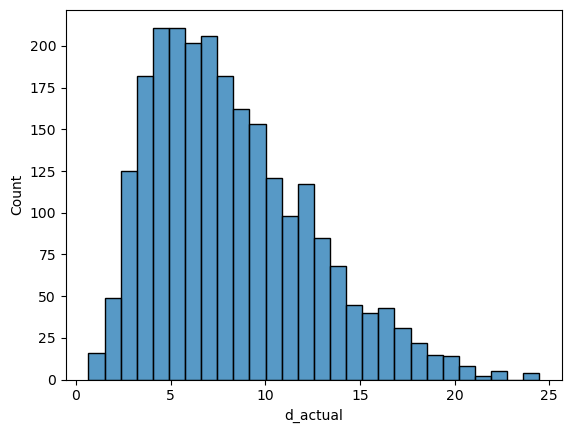

In [19]:
sns.histplot(metric_df.loc[(metric_df.tackle_category=='proactive') & (metric_df.contactFrameId > 20),:].d_actual)

c:\Users\pschl\anaconda3\envs\nfl_bdb24\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pschl\anaconda3\envs\nfl_bdb24\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='contactFrameId', ylabel='Count'>

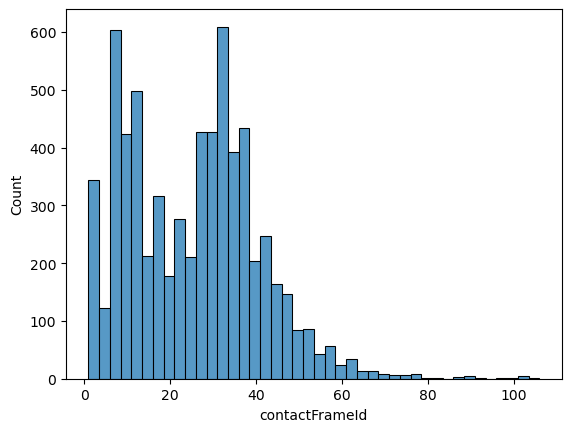

In [20]:
sns.histplot(metric_df.contactFrameId)

In [21]:
metric_df.loc[(metric_df.tackle_category=='proactive') & (metric_df.contactFrameId > 20) & (metric_df.d_ideal >= 3),:].d_eff.describe()

count    2034.000000
mean        0.900820
std         0.119249
min         0.339828
25%         0.860036
50%         0.951495
75%         0.982732
max         1.002224
Name: d_eff, dtype: float64

The median is 0.9515. Use that value for plays either with < 2 seconds of lead up to first contact, or for low distance plays (< 3 straight line yards from original position 3 seconds before contact to contact)

In [22]:
def feat_vision_metric(metric_df: pd.DataFrame) -> np.ndarray:
    median_deff = 0.9515
    return np.where(metric_df.contactFrameId < 20, median_deff, # too short lead up - default to median
                    np.where(metric_df.d_ideal < 3, median_deff, # too short distance - default to median
                             np.where(metric_df.d_eff > 1, 1, metric_df.d_eff) # use d_eff, but cap at 1 (rounding of "dist" can cause > 1 for some plays)
                             )
                    )

In [23]:
metric_df = metric_df.assign(vision_metric = lambda df: feat_vision_metric(df))
metric_df

,gameId,playId,contactFrameId,tackleFrameId,frames,d_actual,d_ideal,d_eff,gap_tackle,w_carrier,...,tackle_category,nflId_t,displayName_t,position_t,ballCarrierId,displayName,position,drive_metric,tackle_gap_metric,vision_metric
0,2022090800,56,10,18,8,5.01,5.006246,0.999251,0.670298,191,...,proactive,43294,Jalen Ramsey,CB,42489,Stefon Diggs,WR,0.610615,1.000000,0.951500
1,2022090800,80,20,26,6,4.87,3.768183,0.773754,0.367696,237,...,reactive,53532,Ernest Jones,ILB,46076,Josh Allen,QB,0.424705,1.000000,0.773754
2,2022090800,101,38,45,7,8.01,5.029374,0.627887,2.476812,203,...,proactive,42816,Troy Hill,CB,47857,Devin Singletary,RB,0.408920,0.000000,0.627887
3,2022090800,122,20,29,9,12.09,11.855248,0.980583,0.573149,203,...,reactive,38577,Bobby Wagner,ILB,47857,Devin Singletary,RB,0.380032,1.000000,0.980583
4,2022090800,167,14,18,4,7.00,6.968414,0.995488,1.591540,191,...,reactive,43298,Leonard Floyd,DE,42489,Stefon Diggs,WR,0.308930,0.510575,0.951500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,2022110700,3658,40,55,15,13.06,12.127753,0.928618,1.341343,211,...,reactive,44871,Tanoh Kpassagnon,DE,43362,Kenyan Drake,RB,0.670777,0.823322,0.928618
6638,2022110700,3686,42,72,30,8.39,6.245190,0.744361,1.015135,211,...,reactive,48027,Kaden Elliss,OLB,43362,Kenyan Drake,RB,0.545607,1.000000,0.744361
6639,2022110700,3707,39,54,15,9.29,9.080666,0.977467,1.452790,211,...,proactive,48027,Kaden Elliss,OLB,43362,Kenyan Drake,RB,0.511397,0.684012,0.977467
6640,2022110700,3740,31,38,7,10.29,9.281939,0.902035,0.733757,211,...,proactive,48537,Carl Granderson,DE,43362,Kenyan Drake,RB,0.488677,1.000000,0.902035


# Write data to file

In [24]:
metric_df.to_csv('interm_files/feat_tackle_metrics.csv', index=False)